In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

In [2]:
f_117 = pd.read_csv('./../data/faults/f_0.117_.txt')
f_495 = pd.read_csv('./../data/faults/f_0.495_.txt')
f_887 = pd.read_csv('./../data/faults/f_0.887_.txt')

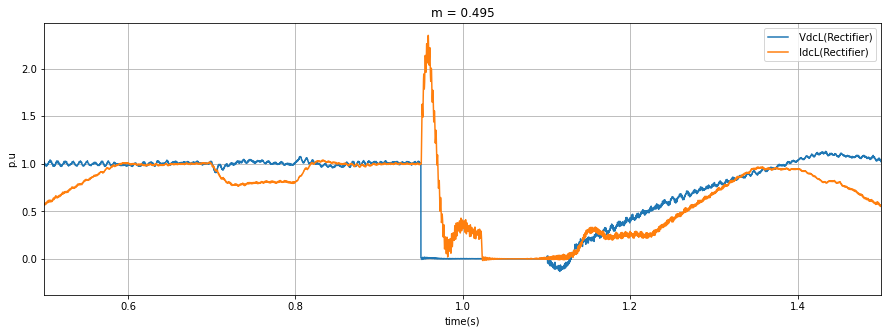

In [17]:
# collected Data
f_495.plot(0,[1,2],title="m = 0.495",figsize=(15,5),xlim=(0.5,1.5),grid=1,xlabel='time(s)',ylabel='p.u');

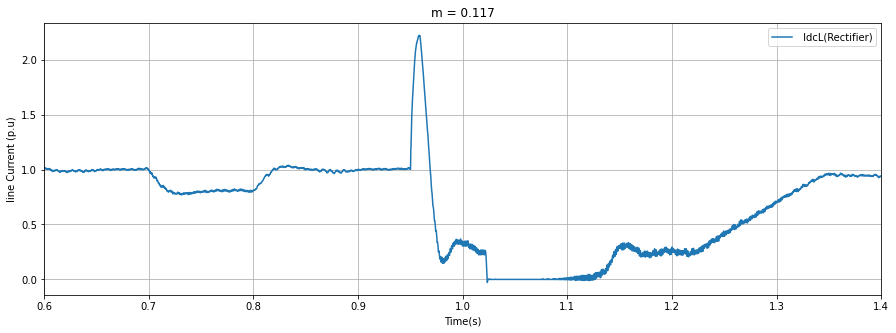

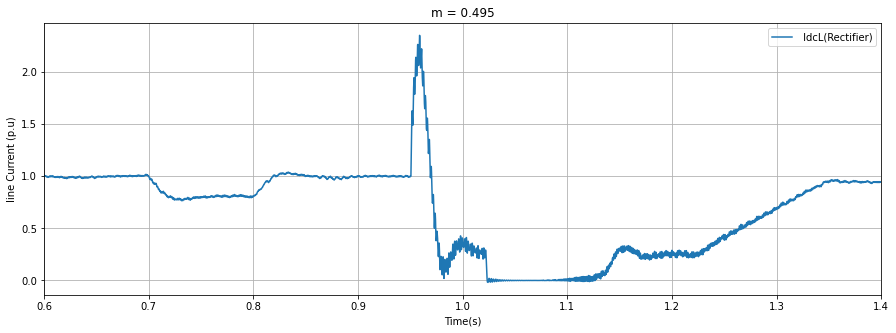

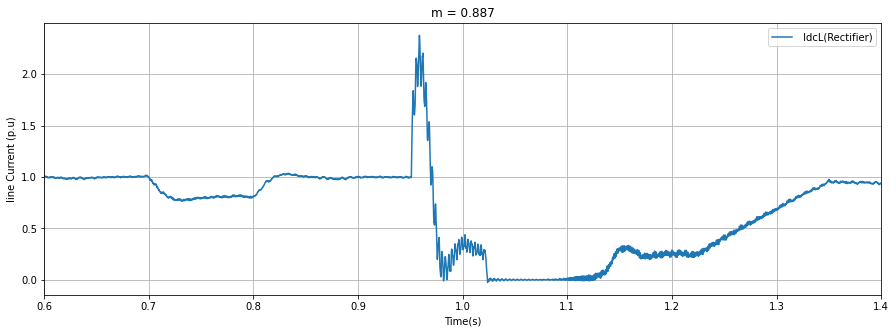

In [18]:
f_117.plot(0,2,figsize=(15,5),title='m = 0.117',grid=True,xlim=(0.6,1.4),xlabel='Time(s)',ylabel='line Current (p.u)')
f_495.plot(0,2,figsize=(15,5),title='m = 0.495',grid=True,xlim=(0.6,1.4),xlabel='Time(s)',ylabel='line Current (p.u)')
f_887.plot(0,2,figsize=(15,5),title='m = 0.887',grid=True,xlim=(0.6,1.4),xlabel='Time(s)',ylabel='line Current (p.u)');

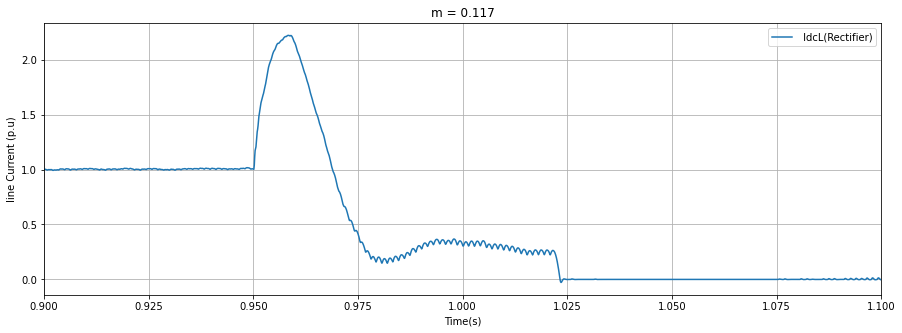

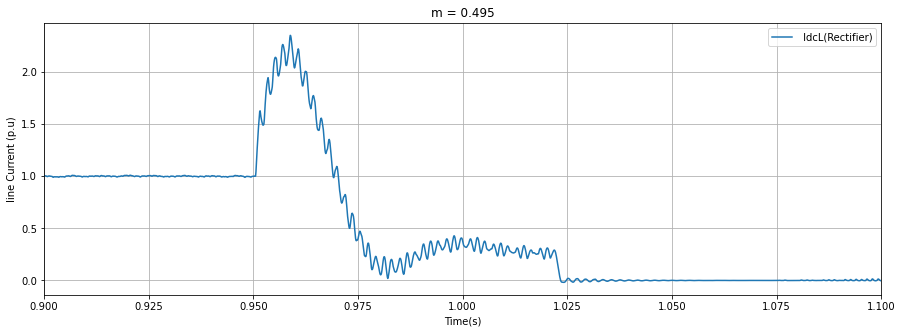

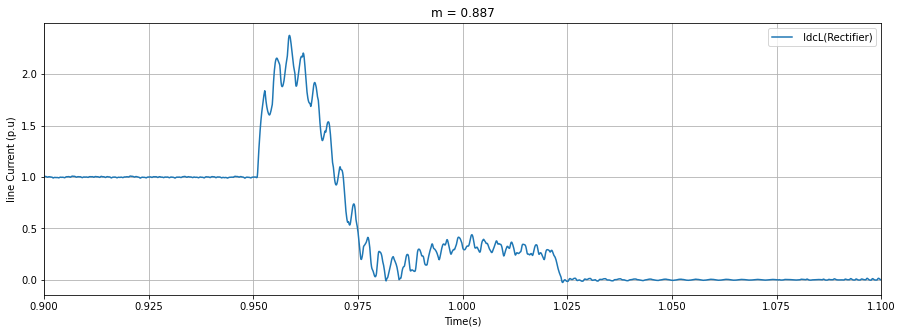

In [19]:
f_117.plot(0,2,figsize=(15,5),title='m = 0.117',grid=True,xlim=(0.9,1.1),xlabel='Time(s)',ylabel='line Current (p.u)')
f_495.plot(0,2,figsize=(15,5),title='m = 0.495',grid=True,xlim=(0.9,1.1),xlabel='Time(s)',ylabel='line Current (p.u)')
f_887.plot(0,2,figsize=(15,5),title='m = 0.887',grid=True,xlim=(0.9,1.1),xlabel='Time(s)',ylabel='line Current (p.u)');

In [5]:
def cleanff(df_):
    retvar = df_[df_.Time>0.9]
    retvar = retvar[retvar.Time<1.1]
    retvar = retvar.reset_index()
    retvar = retvar.drop(columns = 'index')
    return retvar

In [6]:
xx = cleanff(f_117)
yy = cleanff(f_495)
zz = cleanff(f_887)

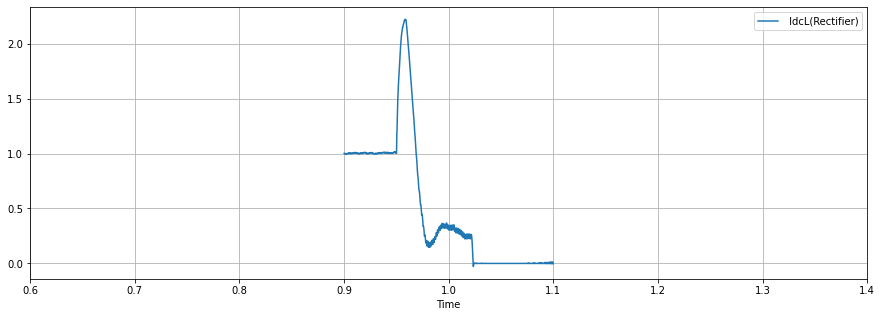

In [7]:
xx.plot(0,2,figsize=(15,5),xlim=(0.6,1.4),grid=1);

In [8]:
Is1 = xx[xx.columns[2]]
Is2 = yy[yy.columns[2]]
Is3 = zz[zz.columns[2]]

In [9]:
f1, t1, Sxx1 = spectrogram(Is1, 1e4, ('tukey',0.001), 40, 10, nfft = len(Is1))
f2, t2, Sxx2 = spectrogram(Is2, 1e4, ('tukey',0.001) , 40, 10, nfft = len(Is2))
f3, t3, Sxx3 = spectrogram(Is3, 1e4, ('tukey',0.001) , 40, 10, nfft = len(Is3))

(0.0, 2500.0)

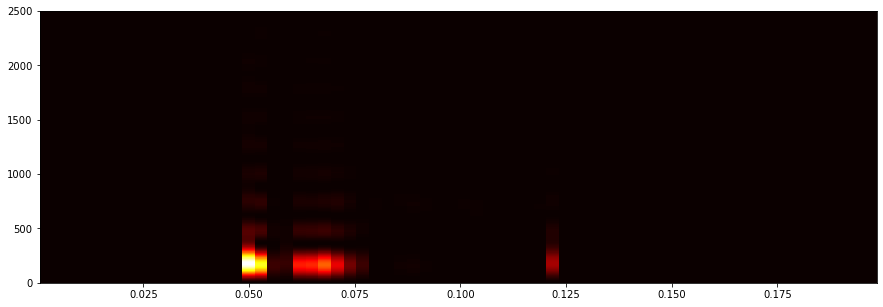

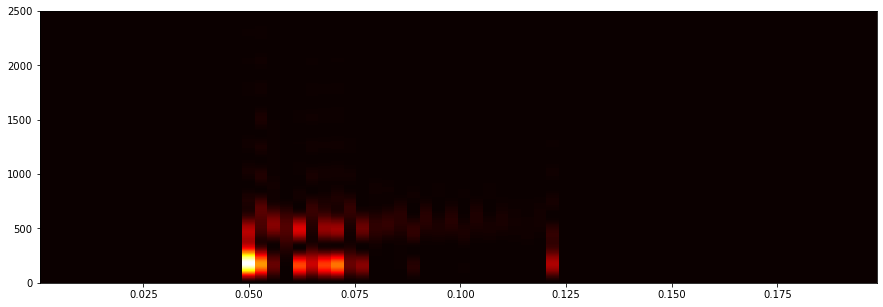

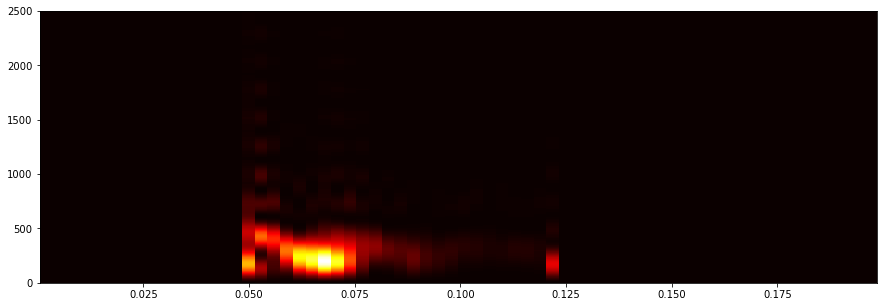

In [10]:
plt.figure(figsize=(15,5))
plt.pcolor(t1, f1, Sxx1, shading='auto', cmap = 'hot')
plt.ylim(0,2500)

plt.figure(figsize=(15,5))
plt.pcolor(t2, f2, Sxx2, shading='auto', cmap = 'hot')
plt.ylim(0,2500)

plt.figure(figsize=(15,5))
plt.pcolor(t3, f3, Sxx3, shading='auto', cmap = 'hot')
plt.ylim(0,2500)